# FUZZY BASED PREDICTION

In [1]:
#LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

LOADING TRAINING DATA

In [2]:
train = pd.read_csv("traindata.csv")
print(np.shape(train))
train.head()

(143, 8)


,N,m,P1,T1,P3,T3,TJC,A
0,94.8,55.7,13.1168,19.5,211.6,725.5,637.7,15.00
1,94.8,55.7,13.1168,19.5,211.6,725.5,690.7,15.75
2,94.8,55.7,13.1168,19.5,211.6,761.0,637.7,15.75
3,94.8,55.7,13.1168,19.5,211.6,761.0,690.7,16.54
4,94.8,55.7,13.1168,19.5,249.3,725.5,637.7,18.75


MULTIPING TRAINING DATA BY 100 TO INCREASE THE VARIATION IN DATA

In [3]:
train.max(axis = 0)

N       98.6000
m       75.3000
P1      13.2544
T1      27.0000
P3     249.3000
T3     761.0000
TJC    690.7000
A      130.2300
dtype: float64

In [4]:
train.min(axis = 0)

N       94.8000
m       55.7000
P1      13.1168
T1      19.5000
P3     211.6000
T3     725.5000
TJC    637.7000
A       15.0000
dtype: float64

RANGE OF INPUT VARIABLES FOR FUZZY CONTROL SYSTEM WITH THIER LABELS

In [5]:
N = ctrl.Antecedent(np.arange(94.80, 98.60, .01), 'N')
m = ctrl.Antecedent(np.arange(55.70, 75.30, .01), 'm')
P1= ctrl.Antecedent(np.arange(13.11,13.25, .0001), 'P1')
T1= ctrl.Antecedent(np.arange(19.50,27.00, .01), 'T1')
P3= ctrl.Antecedent(np.arange(211.60,249.30, .01), 'P3')
T3= ctrl.Antecedent(np.arange(725.50,761.00, .01), 'T3')
TJC= ctrl.Antecedent(np.arange(637.70,690.70, .01), 'TJC')
A = ctrl.Consequent(np.arange(15.00, 130.23, .01), 'A')

PERFORMING TRIGULAR MEMBERSHIP FUNCTION

In [6]:
N.automf(3)
m.automf(3)
P1.automf(3)
T1.automf(3)
P3.automf(3)
T3.automf(3)
TJC.automf(3)

RANGE OF OUTPUT VARIBLE IN LINGUISTIC TERMS

In [7]:
A['poor'] = fuzz.trimf(A.universe, [15.00, 15.00, 72.615])
A['average'] = fuzz.trimf(A.universe, [15.00, 72.615, 130.23])
A['good'] = fuzz.trimf(A.universe, [72.615, 130.23, 130.23])


# GRAPHICAL REPRESENTION EACH MEMBERSHIP FUNCTION

/home/adizz/anaconda3/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


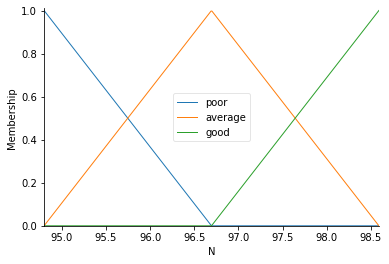

In [8]:
N.view()

/home/adizz/anaconda3/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


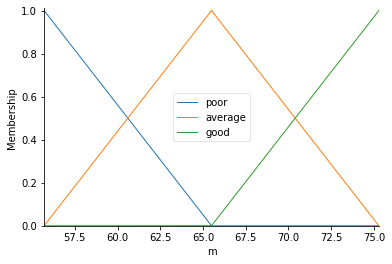

In [9]:
m.view()

/home/adizz/anaconda3/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


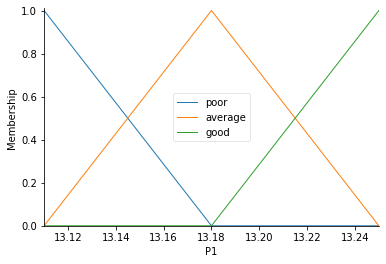

In [10]:
P1.view()

/home/adizz/anaconda3/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


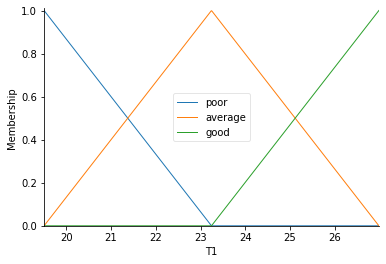

In [11]:
T1.view()

/home/adizz/anaconda3/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


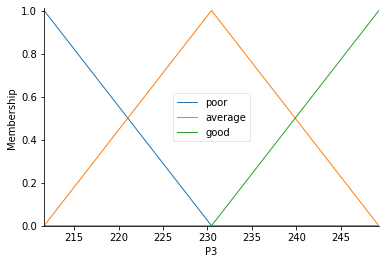

In [12]:
P3.view()

/home/adizz/anaconda3/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


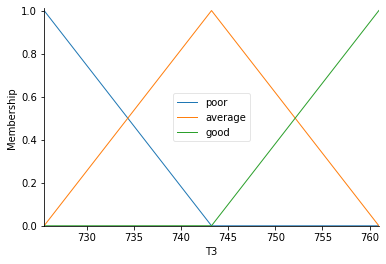

In [13]:
T3.view()

/home/adizz/anaconda3/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


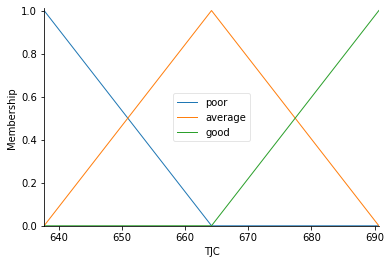

In [14]:
TJC.view()

/home/adizz/anaconda3/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


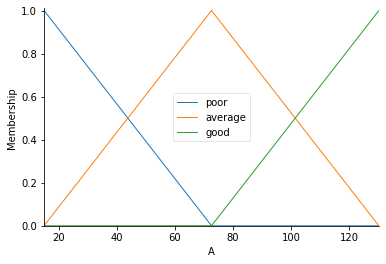

In [15]:
A.view()

LOADING RULEBASE

In [28]:
rule = pd.read_csv("CNN_Rulebase.csv")

In [29]:
rule.head()

,Unnamed: 0,0,1,2,3,4,5,6,A
0,0,L,M,M,M,L,M,H,M
1,1,H,L,L,L,H,M,L,L
2,2,M,H,M,M,L,L,H,M
3,3,H,L,H,L,L,M,L,L
4,4,H,L,M,M,H,H,M,L


In [30]:
#DELETING FIRST COLUMN AS IT IS OF NO USE
del rule['Unnamed: 0']
#sp	mf	IP	IT	CEP	CET	TCJ	AMP
rule=rule.rename(columns={"0":"sp","1":"mf","2":"IP","3":"IT","4":"CEP","5":"CET","6":"TCJ","A":"AMP"})

In [31]:
rule.head()

,sp,mf,IP,IT,CEP,CET,TCJ,AMP
0,L,M,M,M,L,M,H,M
1,H,L,L,L,H,M,L,L
2,M,H,M,M,L,L,H,M
3,H,L,H,L,L,M,L,L
4,H,L,M,M,H,H,M,L


In [32]:
print(rule['sp'].value_counts())
print(rule['mf'].value_counts())
print(rule['IP'].value_counts())
print(rule['IT'].value_counts())
print(rule['CEP'].value_counts())
print(rule['CET'].value_counts())
print(rule['TCJ'].value_counts())
print(rule['AMP'].value_counts())

H    729
M    729
L    729
Name: sp, dtype: int64
H    729
M    729
L    729
Name: mf, dtype: int64
H    729
M    729
L    729
Name: IP, dtype: int64
H    729
M    729
L    729
Name: IT, dtype: int64
H    729
M    729
L    729
Name: CEP, dtype: int64
H    729
M    729
L    729
Name: CET, dtype: int64
H    729
M    729
L    729
Name: TCJ, dtype: int64
M    967
L    695
H    525
Name: AMP, dtype: int64


MAPPING LINGUSTIC TERMS ACCORDING TO FUZZY CONTROL SYSTEM

In [33]:
rule=rule.replace(to_replace =["L", "M","H"],  
                            value =["poor","average","good"]) 

In [34]:
rule.head()

,sp,mf,IP,IT,CEP,CET,TCJ,AMP
0,poor,average,average,average,poor,average,good,average
1,good,poor,poor,poor,good,average,poor,poor
2,average,good,average,average,poor,poor,good,average
3,good,poor,good,poor,poor,average,poor,poor
4,good,poor,average,average,good,good,average,poor


SINCE INSTANCES IN RULEBASE IS 3^7 =2187, THUS MAKING INFERENCE SYSTEM WITH ALL THOSE RULES

In [35]:
lst=[]
lst=[None]*2187
for i in range(0,2187):
    lst[i]= ctrl.Rule(N[rule.at[i,'sp']] & m[rule.at[i,'mf']] & P1[rule.at[i,'IP']] & T1[rule.at[i,'IT']] & P3[rule.at[i,'CEP']] & T3[rule.at[i,'CET']] & TJC[rule.at[i,'TCJ']], A[rule.at[i,'AMP']])

In [36]:
lst

[IF (((((N[poor] AND m[average]) AND P1[average]) AND T1[average]) AND P3[poor]) AND T3[average]) AND TJC[good] THEN A[average]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (((((N[good] AND m[poor]) AND P1[poor]) AND T1[poor]) AND P3[good]) AND T3[average]) AND TJC[poor] THEN A[poor]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (((((N[average] AND m[good]) AND P1[average]) AND T1[average]) AND P3[poor]) AND T3[poor]) AND TJC[good] THEN A[average]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (((((N[good] AND m[poor]) AND P1[good]) AND T1[poor]) AND P3[poor]) AND T3[average]) AND TJC[poor] THEN A[poor]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (((((N[good] AND m[poor]) AND P1[average]) AND T1[average]) AND P3[good]) AND T3[good]) AND TJC[average] THEN A[poor]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (((((N[average] AND m[poor]) AND P1[good]) A

PASSING THE ALL 2187 RULES INTO INFERENCE SYSTEM

In [37]:
tipping_ctrl = ctrl.ControlSystem(lst)

In [39]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

# Prediction on Test Data

LOADING TEST DATA

In [48]:
test = pd.read_csv("testdata.csv")
print(np.shape(test))
test.head()

(24, 9)


,NL,m,P1,T1,P3,T3,TJ,Analytical value,Experimental value
0,95.0504,69.8002,13.13,25.8,222.5,752.0,685.0,76.0174,44.3950
1,95.7920,71.5995,13.16,26.1,233.5,742.9,651.4,72.6498,65.0570
2,96.1042,72.1003,13.12,26.1,235.2,743.5,646.3,68.9307,58.1874
3,96.4946,72.4002,13.15,24.5,234.3,761.0,686.9,67.4881,81.0985
4,97.3730,74.1005,13.15,25.2,243.9,747.9,672.0,68.2048,77.7258


In [49]:
del test['Experimental value']

In [50]:
test.head()

,NL,m,P1,T1,P3,T3,TJ,Analytical value
0,95.0504,69.8002,13.13,25.8,222.5,752.0,685.0,76.0174
1,95.7920,71.5995,13.16,26.1,233.5,742.9,651.4,72.6498
2,96.1042,72.1003,13.12,26.1,235.2,743.5,646.3,68.9307
3,96.4946,72.4002,13.15,24.5,234.3,761.0,686.9,67.4881
4,97.3730,74.1005,13.15,25.2,243.9,747.9,672.0,68.2048


PASSING TEST DATA IN INFERENCE SYSTEM

In [51]:
out_test=[None]*24
for i in range(0,24):
    tipping.input['N'] = test.at[i,'NL']
    tipping.input['m'] = test.at[i,'m']
    tipping.input['P1'] = test.at[i,'P1']
    tipping.input['T1'] = test.at[i,'T1']
    tipping.input['P3'] = test.at[i,'P3']
    tipping.input['T3'] = test.at[i,'T3']
    tipping.input['TJC'] =test.at[i,'TJ']
    tipping.compute()
    out_test[i]=tipping.output['A']
    

DEFUZZIFICATION OF TEST DATA

In [52]:
print(out_test)

[75.54348701948945, 79.33879294249463, 83.44592526655053, 74.57461340947908, 83.4622728692187, 82.58325593924415, 82.73898920388844, 94.43239842206744, 83.12839706405103, 92.67081651926193, 81.78727621135089, 93.12100868517663, 83.86669966958017, 97.1392077162572, 69.89645080159329, 80.39194510800898, 82.36537598993377, 77.79652629771535, 77.112710278383, 75.31314180516317, 77.30041746924657, 82.35682893591671, 73.63629352357286, 79.35264824315047]


In [53]:
deviation=0
for i in range(24):
    deviation=deviation+abs(out_test[i]-test.at[i,'Analytical value'])
deviation=deviation/24
print("Deviation Obtained")
print(deviation)

Deviation Obtained
10.621791274172535


In [54]:
from sklearn.metrics import mean_squared_error
y_test_actual=test['Analytical value'].tolist()
print(y_test_actual)
mse=mean_squared_error(y_test_actual,out_test)
print(mse)
rmse=mse**(1/2)
print(rmse)

[76.0174, 72.6498, 68.9307, 67.4881, 68.2048, 76.1176, 79.6377, 71.4396, 71.02, 83.9, 74.0933, 87.6346, 85.2, 100.0489, 64.6306, 62.2268, 66.9227, 64.6124, 65.4812, 66.156, 58.9091, 60.1873, 59.1696, 67.1881]
150.74902003486557
12.277989250478498
